In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
import json
import itertools
import matplotlib
matplotlib.rcParams['font.family'] = ['Heiti TC']

data_dir = Path("../../../../Data/0archive/")

In [11]:
def load_data(*path_globs):
    return pd.concat([
        pd.read_json(json_file, lines=True, encoding="utf-8")
        for json_file in itertools.chain(*[ json_dir.glob(path_glob) for path_glob in path_globs ])
    ], ignore_index=True, sort=False)

def convert(df):
    for f in ["published_at", "first_seen_at", "last_updated_at"]:
        df[f] = pd.to_datetime(df[f])
    df["published_date"] = df.published_at.map(lambda d: d.date())
    df["published_month"] = df.published_date.apply(lambda x: '-'.join(str(x).split('-')[:2]))

In [24]:
# 將每一個網站的四月份資料合併成一個 Dataframe

full_df = pd.DataFrame()
for producer in os.listdir(data_dir):
    if producer.startswith('.'): continue
    
    print(producer)
    json_dir = data_dir / producer
    df = load_data("2020-04-*.jsonl")
    convert(df)
    # remove duplicate titles
    df = df.drop_duplicates("title", keep="first")
    # add readable producer name
    df["producer_name"] = producer.split('(')[0].strip()
    # concat to full dataframe
    full_df = pd.concat([full_df, df], ignore_index=True, sort=False)

中央社 (www.cna.com.tw) 5030a7bf-81fe-11ea-8627-f23c92e71bad
觀察者 (www.guancha.cn) 5030a925-81fe-11ea-8627-f23c92e71bad
台灣醒報 (anntw.com) 5030b4e4-81fe-11ea-8627-f23c92e71bad
Ptt 八卦版 (www.ptt.cc) 5030a4ff-81fe-11ea-8627-f23c92e71bad
中時電子報 (www.chinatimes.com) 5030a59d-81fe-11ea-8627-f23c92e71bad
中國報 (www.chinapress.com.my) 5030bdf5-81fe-11ea-8627-f23c92e71bad
東森新聞 (news.ebc.net.tw) 5030a5e1-81fe-11ea-8627-f23c92e71bad
風傳媒 (www.storm.mg) 5030bba7-81fe-11ea-8627-f23c92e71bad
三立新聞網 (www.setn.com) 5030ba7f-81fe-11ea-8627-f23c92e71bad
鏡週刊 (www.mirrormedia.mg) 5030bb60-81fe-11ea-8627-f23c92e71bad
自由時報 (news.ltn.com.tw) 5030a77a-81fe-11ea-8627-f23c92e71bad
蘋果即時 (tw.appledaily.com) 5030a6d1-81fe-11ea-8627-f23c92e71bad
中國評論新聞網 (hk.crntt.com) 5030b5ff-81fe-11ea-8627-f23c92e71bad
聯合新聞網 (udn.com) 5030a71b-81fe-11ea-8627-f23c92e71bad
CTWant (www.ctwant.com) 5030b568-81fe-11ea-8627-f23c92e71bad
新頭殼 (newtalk.tw) 5030c02e-81fe-11ea-8627-f23c92e71bad
ETtoday 新聞雲 (www.ettoday.net) 5030a629-81fe-11ea-8627-f23

In [26]:
full_df[["title", "published_date", "published_month", "producer_name"]]

,title,published_date,published_month,producer_name
0,農村營造無障礙環境 水保局邀身障長輩遊南投 | 地方 | 中央社 CNA,2020-04-30,2020-04,中央社
1,車手首領遭通緝9次在逃 刑事局緝狐歸案 | 社會 | 中央社 CNA,2020-04-30,2020-04,中央社
2,旺宏第1季每股賺0.67元 目前產能維持滿載 | 證券 | 中央社 CNA,2020-04-30,2020-04,中央社
3,新台幣再現2字頭 升8.5分收29.951元 | 產經 | 重點新聞 | 中央社 CNA,2020-04-30,2020-04,中央社
4,SBL總冠軍賽裕隆拚關門 以不變應萬變 | 運動 | 中央社 CNA,2020-04-30,2020-04,中央社
...,...,...,...,...
172991,獨／返台第三天！類包機一女發燒超38度 下午急送負壓病房隔離 | ETtoday生活 | E...,2020-04-01,2020-04,ETtoday 新聞雲
172992,VICTOR與BWF攜手推全新戶外羽球 專用球AS AirShuttle5月上市 | ETt...,2020-04-01,2020-04,ETtoday 新聞雲
172993,法國封城家樂福推「甘心服務」 合夥Uber Eats日用品半小時送上門 | ETtoday國...,2020-04-01,2020-04,ETtoday 新聞雲
172994,志村健眼中的台灣風景！開窗藍皮火車、18年前老餐廳現在還吃得到 | ETtoday 旅遊雲 ...,2020-04-01,2020-04,ETtoday 新聞雲


In [89]:
# 計算標題中武漢肺炎與新冠肺炎的使用頻率

phrase_count_df = pd.DataFrame()
for producer in np.unique(full_df["producer_name"]):
    # init a counter dictionary
    phrase_count = {"新冠肺炎": 0, "武漢肺炎": 0}
    
    # find all the titles that belong to the producer
    producer_titles = full_df[full_df["producer_name"]==producer]["title"]
    
    # count
    for title in producer_titles:
        for phrase in list(phrase_count.keys()): 
            if phrase in title:
                phrase_count[phrase]+=1
                
    # concat with other producer count into a dataframe
    df = pd.DataFrame.from_dict([phrase_count])
    df["producer_name"] = producer
    df["total"] = sum(phrase_count.values())
    phrase_count_df = pd.concat([phrase_count_df, df], ignore_index=True, sort=False)

In [90]:
# 計算比例
phrase_count_df["武漢肺炎 %"] = phrase_count_df.apply(lambda row: 100*row["武漢肺炎"]/row["total"], axis =1)
phrase_count_df.sort_values("武漢肺炎 %", ascending=False, inplace=True)

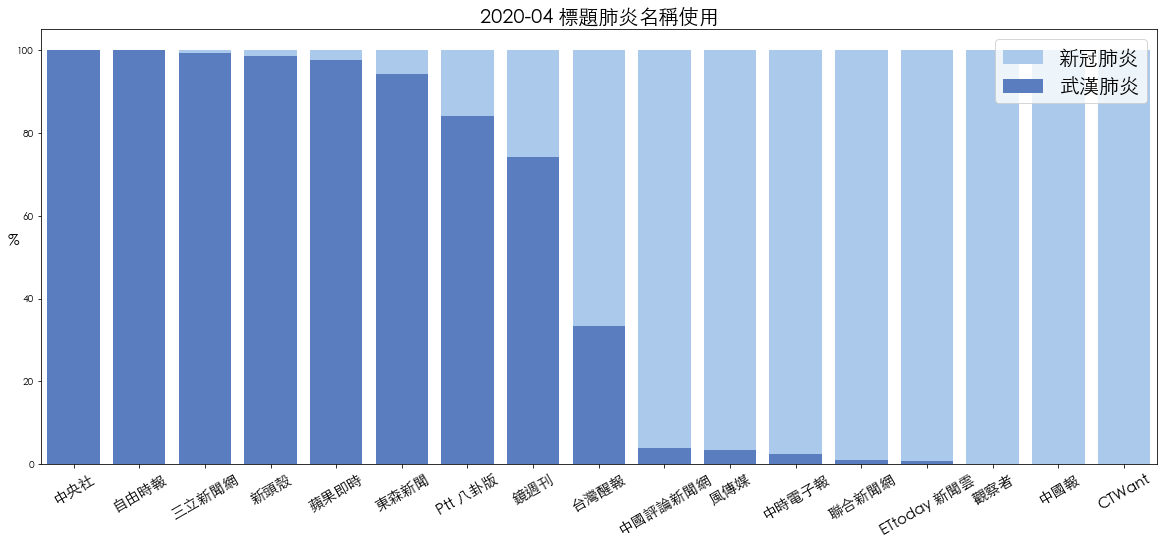

In [92]:
# plot
import seaborn as sns
plt.figure(figsize=(20, 8))
sns.set_color_codes("pastel")
sns.barplot(x=phrase_count_df["producer_name"], y=[100]*len(phrase_count_df),
            label="新冠肺炎", color="b")

sns.set_color_codes("muted")
sns.barplot(x="producer_name", y="武漢肺炎 %", data=phrase_count_df,
            label="武漢肺炎", color="b")


plt.legend(loc="upper right", fontsize=20)
plt.xlabel("")
plt.ylabel("%", fontsize=15, rotation=0)
plt.xticks(fontsize=15, rotation=30)
plt.title("2020-04 標題肺炎名稱使用", fontsize=20)
plt.savefig("Apr-titles-covid-names.png")
